<a href="https://colab.research.google.com/github/FZsara/image_processing/blob/main/ip5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


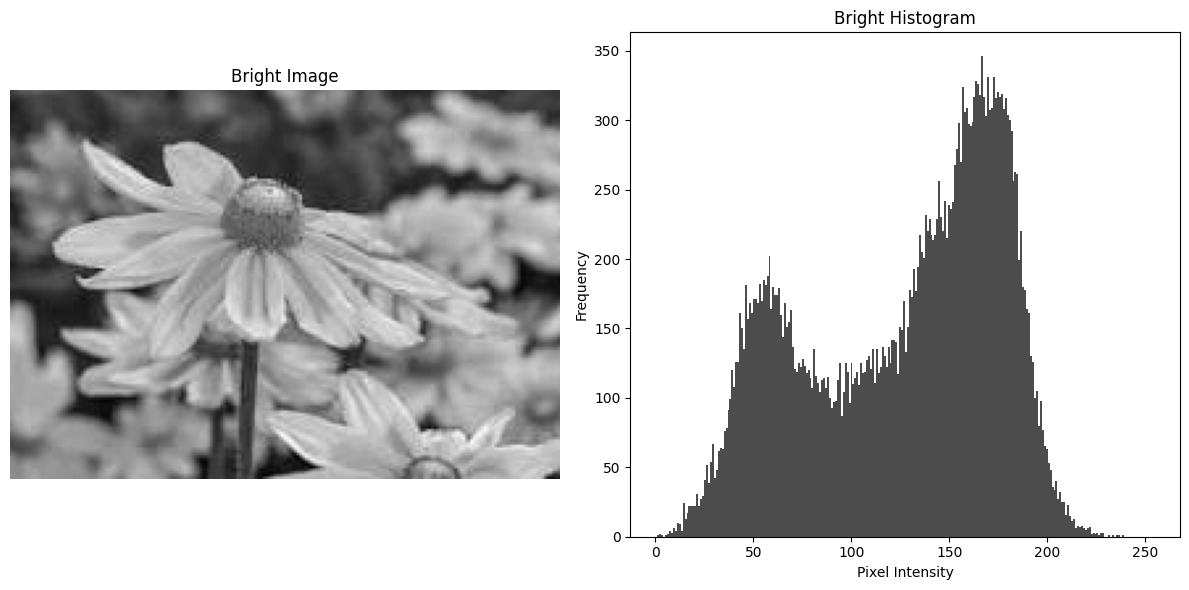

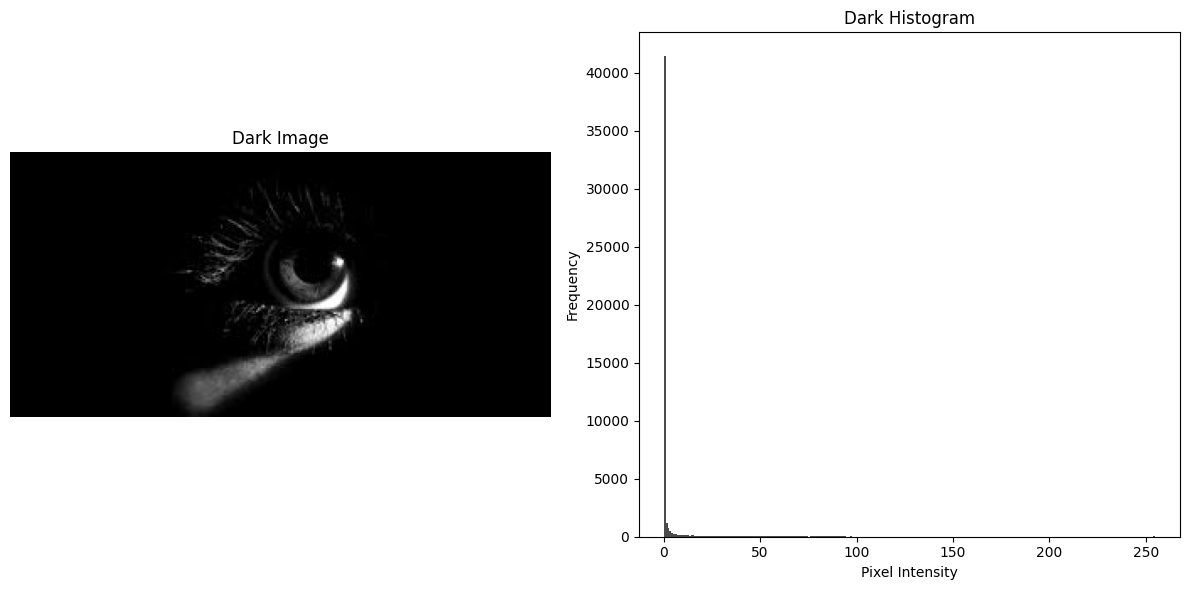

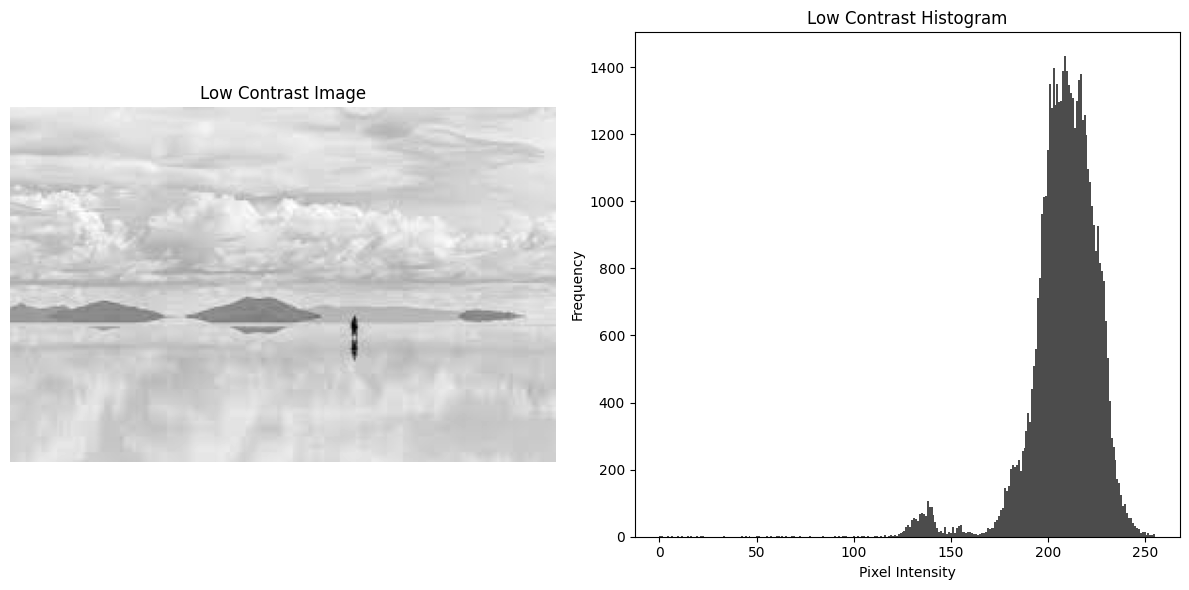

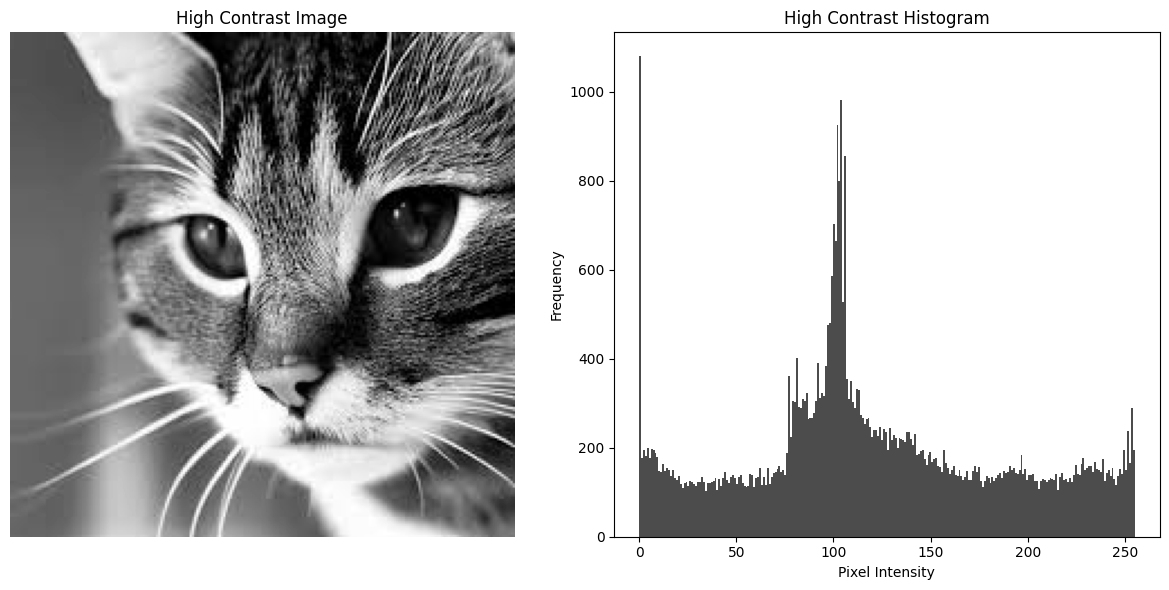

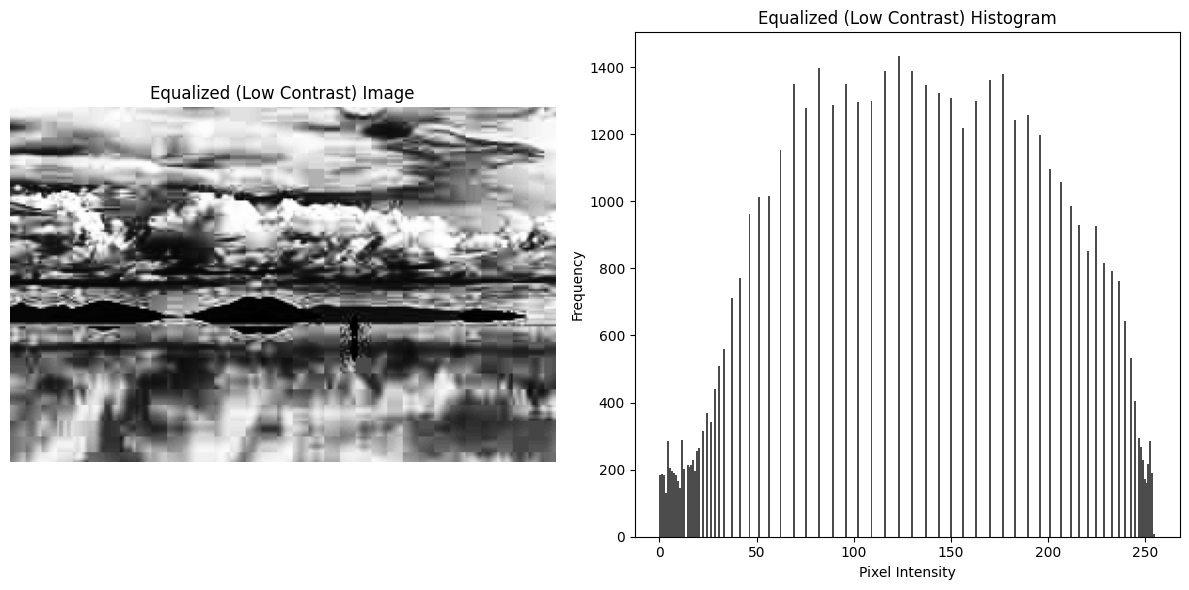

In [ ]:
# Import necessary libraries
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# Function to display the image and its histogram
def show_image_and_histogram(image, title):
    plt.figure(figsize=(12, 6))

    # Show image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f"{title} Image")
    plt.axis('off')

    # Show histogram
    plt.subplot(1, 2, 2)
    plt.hist(np.array(image).flatten(), bins=256, range=(0, 255), color='black', alpha=0.7)
    plt.title(f"{title} Histogram")
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

# Function to manually perform histogram equalization
def manual_histogram_equalization(image):
    img_array = np.array(image)

    # Step 1: Calculate the histogram
    hist, bins = np.histogram(img_array.flatten(), bins=256, range=[0, 256])

    # Step 2: Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()  # cumulative sum of the histogram
    cdf_normalized = cdf * (255 / cdf[-1])  # normalize CDF to range 0-255

    # Step 3: Map the old pixel values to the new pixel values using CDF
    img_equalized = np.interp(img_array.flatten(), bins[:-1], cdf_normalized)

    # Step 4: Reshape back to the original image shape
    img_equalized = img_equalized.reshape(img_array.shape).astype(np.uint8)

    # Convert the result back to an image
    return Image.fromarray(img_equalized)

# Load images: replace these paths with your actual image file paths
bright_image = Image.open("/content/drive/MyDrive/bright.jpeg").convert('L')  # convert to grayscale
dark_image = Image.open("/content/drive/MyDrive/dark.jpeg").convert('L')
low_contrast_image = Image.open("/content/drive/MyDrive/low_contrast.jpeg").convert('L')
high_contrast_image = Image.open("/content/drive/MyDrive/high_contrast.jpeg").convert('L')

# Display original images and their histograms
show_image_and_histogram(bright_image, "Bright")
show_image_and_histogram(dark_image, "Dark")
show_image_and_histogram(low_contrast_image, "Low Contrast")
show_image_and_histogram(high_contrast_image, "High Contrast")

# Perform manual histogram equalization on one of the images (e.g., low contrast image)
equalized_image = manual_histogram_equalization(low_contrast_image)

# Show the equalized image and its histogram
show_image_and_histogram(equalized_image, "Equalized (Low Contrast)")
